# Import Dataset

In [2]:
import pandas as pd

df=pd.read_csv('/content/sample_data/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ï¿½_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:

df=df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ï¿½_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data Preprocessing

In [108]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
# Convert 'v2' column to string
df['v2'] = df['v2'].astype(str)

# Lowercasing and Removing Punctuation
df['v2'] = df['v2'].str.lower().str.replace('[^\w\s]', '',regex=True)

# Tokenization
from nltk.tokenize import word_tokenize
df['v2'] = df['v2'].apply(word_tokenize)

# Removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['v2'] = df['v2'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df['v2'] = df['v2'].apply(lambda x: [stemmer.stem(word) for word in x])
df

,v1,v2,message_length
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre...",16
1,ham,"[ok, lar, joke, wif, u, oni]",6
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",23
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]",9
4,ham,"[nah, dont, think, goe, usf, live, around, tho...",8
...,...,...,...
5567,spam,"[2nd, time, tri, 2, contact, u, u, ï½750, poun...",20
5568,ham,"[ï½_, b, go, esplanad, fr, home]",6
5569,ham,"[piti, mood, soani, suggest]",4
5570,ham,"[guy, bitch, act, like, id, interest, buy, som...",14


In [8]:
a=df['v1'].unique()
a

array(['ham', 'spam'], dtype=object)

# Data Visualization

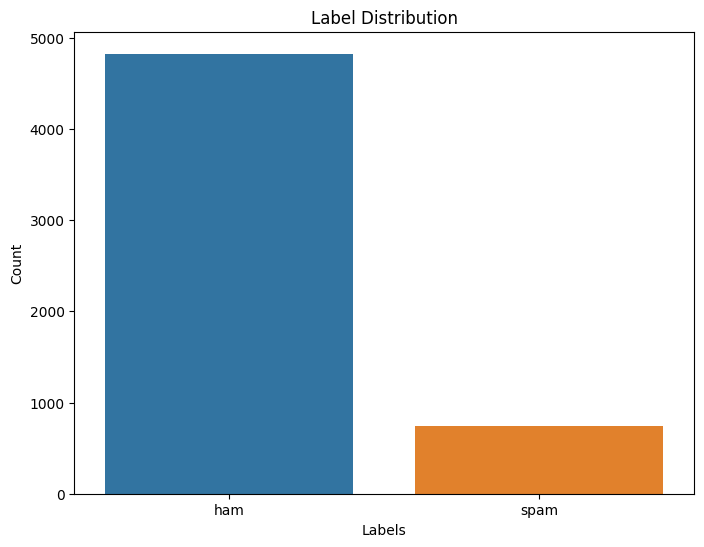

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Chart for Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='v1', data=df)
plt.title('Label Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

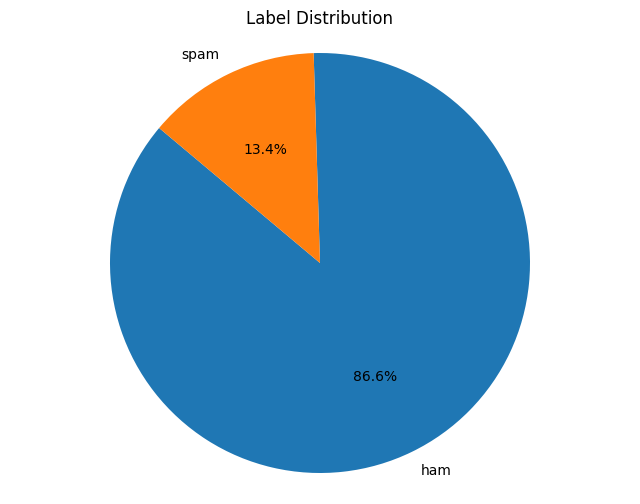

In [10]:
# Pie Chart for Label Distribution
label_counts = df['v1'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Label Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()

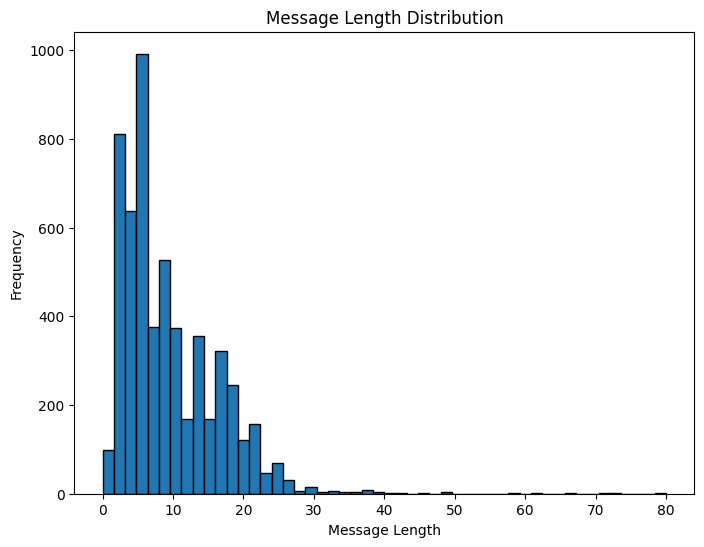

In [11]:
# Histogram for Message Length
df['message_length'] = df['v2'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(df['message_length'], bins=50, edgecolor='black')
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

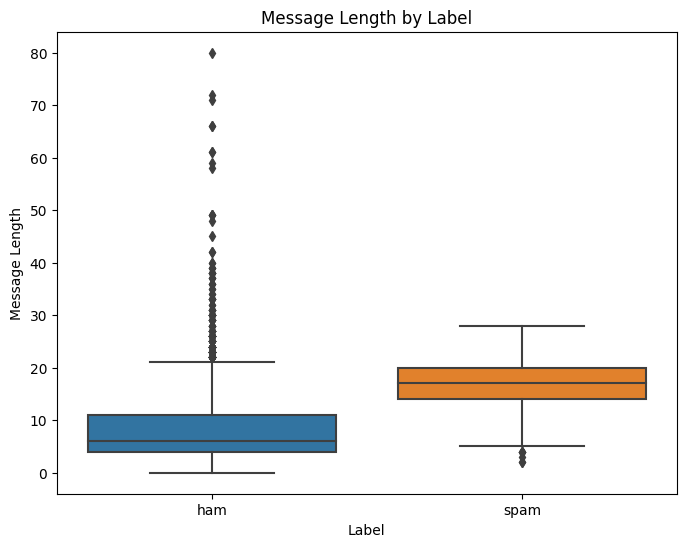

In [12]:
#Boxplot for Message Length
plt.figure(figsize=(8, 6))
sns.boxplot(x='v1', y='message_length', data=df)
plt.title('Message Length by Label')
plt.xlabel('Label')
plt.ylabel('Message Length')
plt.show()

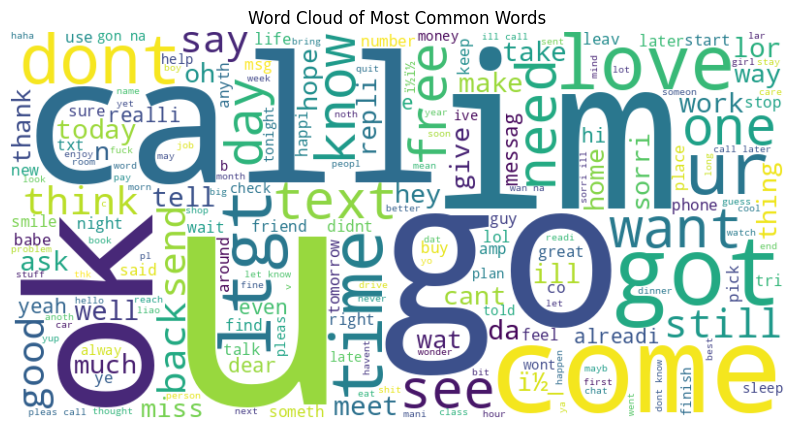

In [13]:
from wordcloud import WordCloud
all_messages = ' '.join([' '.join(words) for words in df['v2']])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_messages)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

# Machine Learning

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Convert the list of words back to a string for TF-IDF
df['v2'] = df['v2'].apply(lambda x: ' '.join(x))

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust 'max_features' as needed

# Convert text data to numerical features using TF-IDF
X = tfidf_vectorizer.fit_transform(df['v2'])
y = df['v1']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict labels on the test set
y_pred = classifier.predict(X_test)

# Evaluate the performance
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'X_train', 'X_test', 'y_train', and 'y_test' have already been defined

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict labels on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the performance
report_rf = classification_report(y_test, y_pred_rf)
print(report_rf)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [42]:
# Sample test data
sample_test_data = {
  'msg'  :["Congratulations! You've won a free iPhone. Claim it now!",
    "Hey, can we meet tomorrow to discuss the project?",
    "URGENT: Your account needs immediate attention. Click here to update.",
    "Reminder: Parent-Teacher meeting at 3 PM today.",
    "Get 50% off on your next purchase. Limited time offer!"]
}
data = pd.DataFrame(sample_test_data)
da=data

In [19]:
#sample test data preprocessing

# Convert 'v2' column to string
data['msg']=data['msg'].astype(str)

# Lowercasing and Removing Punctuation
data['msg'] =data['msg'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Tokenization
from nltk.tokenize import word_tokenize
data['msg'] =data['msg'].apply(word_tokenize)

# Removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['msg']=data['msg'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data['msg']= data['msg'].apply(lambda x: [stemmer.stem(word) for word in x])
data

,msg
0,"[congratul, youv, free, iphon, claim]"
1,"[hey, meet, tomorrow, discuss, project]"
2,"[urgent, account, need, immedi, attent, click,..."
3,"[remind, parentteach, meet, 3, pm, today]"
4,"[get, 50, next, purcha, limit, time, offer]"


In [127]:
# Convert text data to numerical features using TF-IDF
X1 = tfidf_vectorizer.fit_transform(data['msg'])
y1 = ['spam','ham','spam','ham','spam']

# Train the classifier on the training data
classifier.fit(X1,y1)

predictions = classifier.predict(X1)

# Print the predictions
for message, label in zip(da['msg'],predictions):
    print(f"Message: {message}\nPredicted Label: {label}\n")

Message: Congratulations! You've won a free iPhone. Claim it now!
Predicted Label: spam

Message: Hey, can we meet tomorrow to discuss the project?
Predicted Label: ham

Message: URGENT: Your account needs immediate attention. Click here to update.
Predicted Label: spam

Message: Reminder: Parent-Teacher meeting at 3 PM today.
Predicted Label: ham

Message: Get 50% off on your next purchase. Limited time offer!
Predicted Label: spam

